In [ ]:

from data_tools import DBClient

# Establish a connection to InfluxDB
query_client = DBClient()

In [5]:
import pytz
from data_tools import DBClient, TimeSeries
from datetime import datetime
from enum import Enum
import matplotlib.pyplot as plt


class ArraySource(Enum):
    STRING_A = 1
    STRING_B = 2
    STRING_C = 3
    ALL = 4

def _get_string_output_power(start: datetime, stop: datetime, array_string: str, client: DBClient):
    assert array_string in ("A", "B", "C"), "Array string must be A, B, or C"
    current = client.query_time_series(start, stop, f"OutputCurrent{array_string}")
    voltage = client.query_time_series(start, stop, f"OutputVoltage{array_string}")
    current, voltage = TimeSeries.align(current, voltage)
    power = current.promote(current * voltage)
    return power

def _get_string_input_power(start: datetime, stop: datetime, array_string: str, client: DBClient):
    assert array_string in ("A", "B", "C"), "Array string must be A, B, or C"
    current = client.query_time_series(start, stop, f"InputCurrent{array_string}")
    voltage = client.query_time_series(start, stop, f"InputVoltage{array_string}")
    current, voltage = TimeSeries.align(current, voltage)
    power = current.promote(current * voltage)
    return power


def get_array_power(start: datetime,
                    stop: datetime,
                    source: ArraySource=ArraySource.ALL,
                    client: DBClient=None) -> TimeSeries:
    
    get_power_func = _get_string_output_power
    
    if client is None:
        client = DBClient()
    if source == ArraySource.STRING_A:
        power_a = get_power_func(start, stop, "A", client)
        power_a.units = "W"
        power_a.meta["field"] = "String A Array Power"
        return power_a
    if source == ArraySource.STRING_B:
        power_b = get_power_func(start, stop, "B", client)
        power_b.units = "W"
        power_b.meta["field"] = "String B Array Power"
        return power_b
    if source == ArraySource.STRING_C:
        power_c = get_power_func(start, stop, "C", client)
        power_c.units = "W"
        power_c.meta["field"] = "String C Array Power"
        return power_c
    power_a = get_power_func(start, stop, "A", client)
    power_b = get_power_func(start, stop, "B", client)
    power_c = get_power_func(start, stop, "C", client)
    power_a, power_b, power_c = TimeSeries.align(power_a, power_b, power_c)
    array_power = power_a.promote(power_a + power_b + power_c)
    array_power.units = "W"
    array_power.meta["field"] = "Total Array Power"
    return array_power

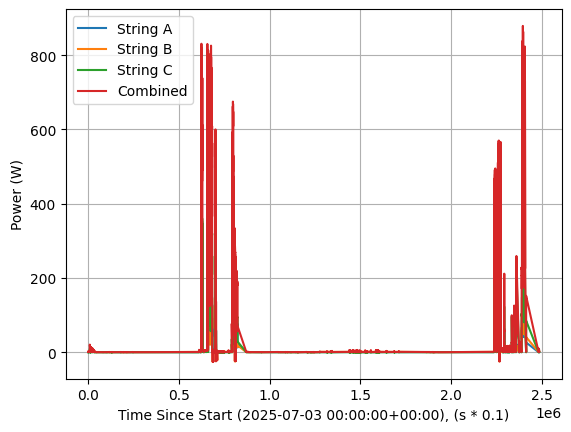

In [7]:
# Array power in Watts, given by tel. current * voltage

start = datetime(2025, 7, 3, 0, 0, 0, tzinfo=pytz.UTC)
stop = datetime(2025, 7, 5, 23, 59, 59, tzinfo=pytz.UTC)

string_a_power = get_array_power(start, stop, ArraySource.STRING_A, query_client)
string_b_power = get_array_power(start, stop, ArraySource.STRING_B, query_client)
string_c_power = get_array_power(start, stop, ArraySource.STRING_C, query_client)
combined_power = get_array_power(start, stop, client=query_client)

plt.plot(string_a_power, label="String A")
plt.plot(string_b_power, label="String B")
plt.plot(string_c_power, label="String C")
plt.plot(combined_power, label="Combined")
plt.xlabel(f"Time Since Start ({start}), (s * 0.1)")
plt.ylabel("Power (W)")
plt.grid(True)
plt.legend(loc="best")
plt.show()

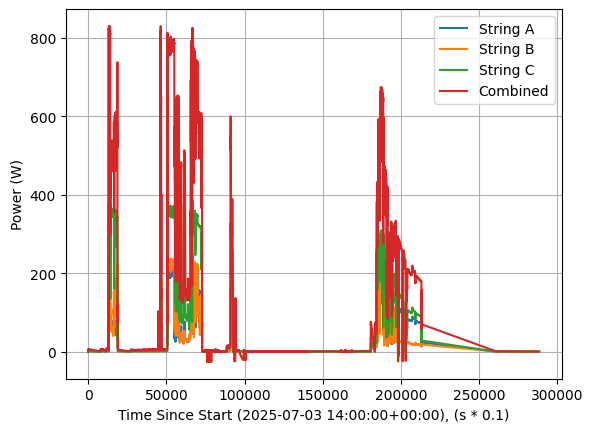

In [12]:
# Split visible sections

start = datetime(2025, 7, 3, 14, 0, 0, tzinfo=pytz.UTC)
stop = datetime(2025, 7, 4, 2, 0, 0, tzinfo=pytz.UTC)

string_a_power = get_array_power(start, stop, ArraySource.STRING_A, query_client)
string_b_power = get_array_power(start, stop, ArraySource.STRING_B, query_client)
string_c_power = get_array_power(start, stop, ArraySource.STRING_C, query_client)
combined_power = get_array_power(start, stop, client=query_client)

plt.plot(string_a_power, label="String A")
plt.plot(string_b_power, label="String B")
plt.plot(string_c_power, label="String C")
plt.plot(combined_power, label="Combined")
plt.xlabel(f"Time Since Start ({start}), (s * 0.1)")
plt.ylabel("Power (W)")
plt.grid(True)
plt.legend(loc="best")
plt.show()

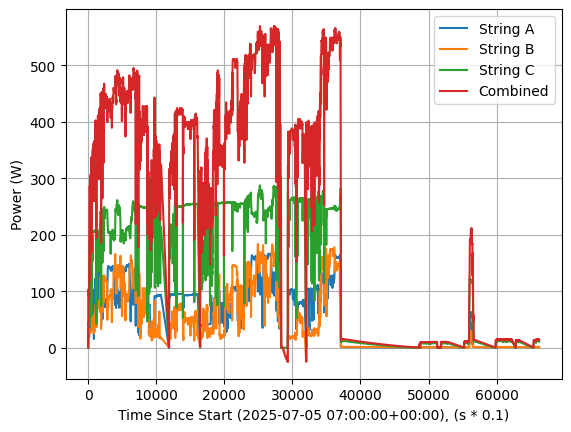

In [11]:
start = datetime(2025, 7, 5, 7, 0, 0, tzinfo=pytz.UTC)
stop = datetime(2025, 7, 5, 16, 0, 0, tzinfo=pytz.UTC)

string_a_power = get_array_power(start, stop, ArraySource.STRING_A, query_client)
string_b_power = get_array_power(start, stop, ArraySource.STRING_B, query_client)
string_c_power = get_array_power(start, stop, ArraySource.STRING_C, query_client)
combined_power = get_array_power(start, stop, client=query_client)

plt.plot(string_a_power, label="String A")
plt.plot(string_b_power, label="String B")
plt.plot(string_c_power, label="String C")
plt.plot(combined_power, label="Combined")
plt.xlabel(f"Time Since Start ({start}), (s * 0.1)")
plt.ylabel("Power (W)")
plt.grid(True)
plt.legend(loc="best")
plt.show()